# Métodos Numéricos 2024 

## Guía 2: 2024-04-04 - Solución de ecuaciones de una variable

In [1]:
using Plots
using LaTeXStrings
using DataFrames # Recuerde instalar este paquete ingresando en una celda: using Pkg; Pkg.add("DataFrames")

### Problema 1

Desarrolle un programa para encontrar la raíz de una función $f$ utilizando el **método de la bisección**.
El programa debe tomar como datos de entrada:

* la función $f:\mathbb{R}\to \mathbb{R}$, 

* el intervalo inicial $[a,b]$, 

* la máxima tolerancia permitida $\varepsilon_x$ al error relativo $(p-x)/x$ de la aproximación $p$ de la raíz $x$ de $f$ en $[a,b]$,

* la máxima tolerancia permitida $\varepsilon_f$ al valor de $|f(p)|$,

* y el número máximo $n_{\max}$ de iteraciones permitidas.

El programa debe retornar una tupla con las siguientes componentes:

* un booleano indicando si el algoritmo convergió o no dentro de las tolerancias máximas permitidas $\varepsilon_x$ y $\varepsilon_f$,

* un vector de componentes $p_i$ que representan las aproximaciones a la raíz $x$ obtenidas por el algoritmo en sucesivas iteraciones $i=1,2,...,n$,

* un vector de componentes $f_i=f(p_i)$,

* un vector de componentes $c_i=|b_i-a_i|/2$ que representan cotas de los errores absolutos $|x-p_i|$,

* y un vector de componentes $r_i=c_i/|p_i|$ que representan estimaciones de los errores relativos $|x-p_i|/|x|$.

El programa debe deternerse si se cumple:

$$
(r_i<\varepsilon_x \;\; \text{AND} \;\; |f_i|<\varepsilon_f) \;\; \text{OR} \;\; i=n_{\max}
$$

El programa debe trabajar con números de precisión suficientemente alta como para obtener resultados con 12 cifras significativas en los reales (ej. `Float64`).

Con el programa desarrollado, Ud. debe:

1. Encontrar una aproximación a $\sqrt{3}$ con un error (relativo en $x$ y absoluto en $y$) menor a $10^{-5}$. Para ello: 

    * Note que $\sqrt{3}$ es la raíz positiva de la ecuación $f(x)=x^2-3$.
    * Grafique $f(x)$ vs $x$ en el intervalo $[1,2]$ para determinar que tiene una raíz allí.
    * Utilice el programa desarrollado para calcular los vectores de aproximaciones y errores.
    * Imprima una lista con los valores $i$, $p_i$, $f_i$, $c_i$ y $r_i$ para $i=1,...,n$, utilizando el paquete `DataFrames`.
    * Grafique $p_i$ vs $i$ usando puntos (en vez de una línea contínua).
    * Grafique $|f_i|$ vs $i$ usando puntos, escala logarítmica en el eje $y$ y lineal en el eje $x$.
    * En una misma figura, grafique con puntos de un color los errores absolutos $c_i$ vs $i$ y con puntos de otro color los errores relativos $r_i$ vs $i$, utilizando escala logarítimica en el eje $y$ y lineal en el eje $x$. 
    * Responda: 
        * Cuanto vale la presunta mejor aproximación $p_n$? 
        * Cuántas iteraciones fueron necesarias?
        * Cuales son los valores exactos de los errores absoluto y relativo que se obtienen de comparando el resultado $p_n$ con el "analítico"?   
    
2. Encontrar la menor solución positiva de la ecuación $g(x)=\tan(x)-2x$ con un error relativo en $x$ y absoluto en $y$ menor a $10^{-5}$. Para ello, repita lo realizado en el inciso anterior considerando el intérvalo $x\in [0.8,1.4]$, pero exceptuando el último item ya que no podemos calcular el valor analítico en este caso. 

**IMPORTANTE:** Recuerde poner títulos, etiquetas a los ejes y leyendas para las curvas o puntos de los gráficos.

In [52]:
function biseccion(f,intervalo;tolx=1e-5,tolf=1e-5,n_max=100)
   a,b=intervalo
    @assert a<=b
    fa=f(a)
    @assert fa*f(b)<0.0
    vec_p=zeros(n_max)
    vec_f=zeros(n_max)
    vec_c=zeros(n_max)
    vec_r=zeros(n_max)
    for i in 1:n_max
        p=0.5*(a+b) #mejor aprox en [a,b]
        fp=f(p)
        c=0.5*(b-a)
        r=abs(c/p)      
        vec_p[i]=p
        vec_f[i]=fp
        vec_c[i]=c
        vec_r[i]=r
        if r<tolx && abs(fp)<tolf
            return true,vec_p[1:i],vec_f[1:i],vec_c[1:i],vec_r[1:i],i #i=n aqui
        end
        if fa*fp<0.0 #la reiz está en [a,x)
            b=p
        else #la rtaiz está en [x,b]
            a=p
            fa=fp
        end   
    end
    return false,vec_p,vec_f,vec_c, vec_r,n_max
end

biseccion (generic function with 1 method)

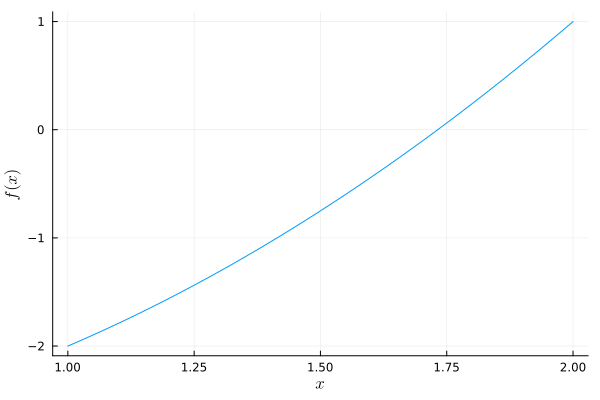

In [53]:
#1.1)
f(x)=x^2-3
interv=(1.,2.)
a,b=interv
plot(a:0.01:b,f,xlabel=L"x",ylabel=L"f(x)",label="")


In [54]:
conv,vec_p,vec_f,vec_c, vec_r,iter=biseccion(f,interv;tolx=1e-5,tolf=1e-5,n_max=100) #hay que ejecutar todo en orden

(true, [1.5, 1.75, 1.625, 1.6875, 1.71875, 1.734375, 1.7265625, 1.73046875, 1.732421875, 1.7314453125, 1.73193359375, 1.732177734375, 1.7320556640625, 1.73199462890625, 1.732025146484375, 1.7320404052734375, 1.7320480346679688], [-0.75, 0.0625, -0.359375, -0.15234375, -0.0458984375, 0.008056640625, -0.01898193359375, -0.0054779052734375, 0.001285552978515625, -0.0020971298217773438, -0.00040602684020996094, 0.00043970346450805664, 1.6823410987854004e-5, -0.00019460543990135193, -8.889194577932358e-5, -3.603450022637844e-5, -9.605602826923132e-6], [0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-5, 3.0517578125e-5, 1.52587890625e-5, 7.62939453125e-6], [0.3333333333333333, 0.14285714285714285, 0.07692307692307693, 0.037037037037037035, 0.01818181818181818, 0.009009009009009009, 0.004524886877828055, 0.002257336343115124, 0.0011273957158962795, 0.0005640157924421884, 0.0002819283901

In [55]:
data=DataFrame(p_i=vec_p,f_i=vec_f,c_i=vec_c,r_i=vec_r)

Row,p_i,f_i,c_i,r_i
,Float64,Float64,Float64,Float64
1,1.5,-0.75,0.5,0.333333
2,1.75,0.0625,0.25,0.142857
3,1.625,-0.359375,0.125,0.0769231
4,1.6875,-0.152344,0.0625,0.037037
5,1.71875,-0.0458984,0.03125,0.0181818
6,1.73438,0.00805664,0.015625,0.00900901
7,1.72656,-0.0189819,0.0078125,0.00452489
8,1.73047,-0.00547791,0.00390625,0.00225734
9,1.73242,0.00128555,0.00195312,0.0011274


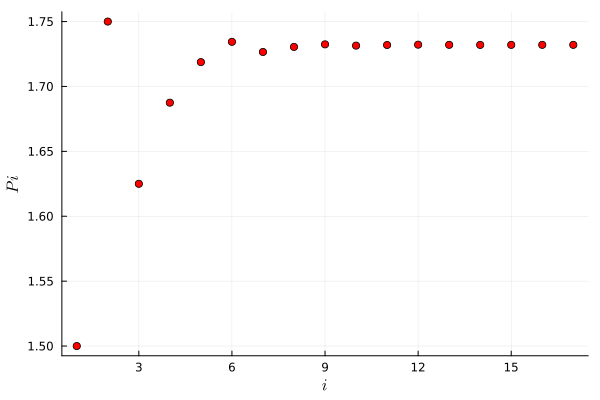

In [56]:
#Grafique pivsi usando puntos (en vez de una línea contínua)
p(x)=vec_p[x]
plot(1:1:17,p,xlabel=L"i",seriestype=:scatter, mc=:red, ylabel=L"Pi",label="")


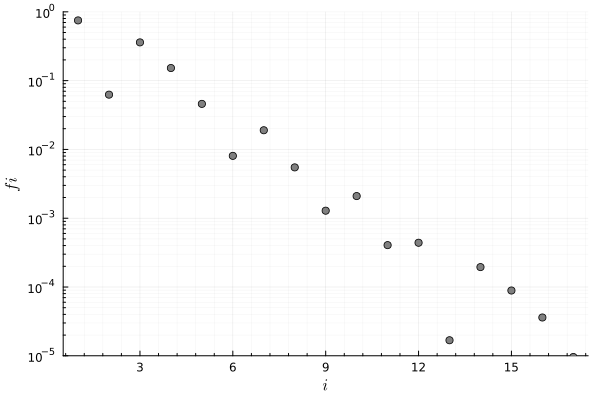

In [57]:
#Grafique |fi|vsi usando puntos, escala logarítmica en el eje "y" y lineal en el eje "x"
g(x)=abs(vec_f[x])
plot(1:1:17,g,xlabel=L"i",seriestype=:scatter, mc=:grey, ylabel=L"fi",label="")
plot!(yscale=:log10, minorgrid=true)
ylims!(1e-5, 1e+0)

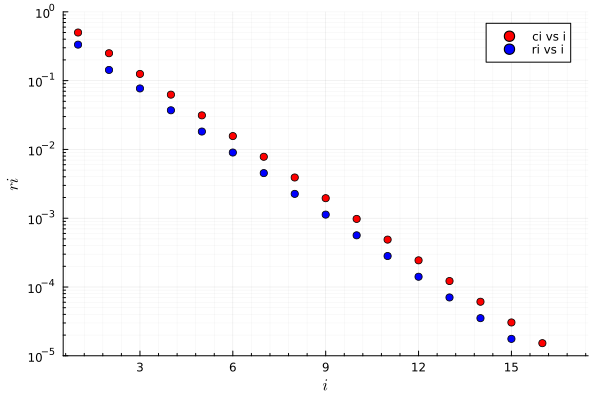

In [58]:
#En una misma figura, grafique con puntos de un color los errores absolutos ci vs i
#con puntos de otro color los errores relativos ri vs i, utilizando escala logarítimica en el eje "y" y lineal en el eje "x"
c(x)=vec_c[x]
r(x)=vec_r[x]

plot(1:1:17,c,xlabel=L"i",seriestype=:scatter, mc=:red, ylabel=L"ci",label="ci vs i")
scatter!(1:1:17,r,xlabel=L"i",seriestype=:scatter, mc=:blue, ylabel=L"ri",label="ri vs i")
plot!(yscale=:log10, minorgrid=true)
ylims!(1e-5, 1e+0)


In [59]:
#respondo preguntas
println(" fueron necesarias $(iter) iteraciones, y la mejor aproximación es  $(vec_p[iter])")
#no entendí la ultima

 fueron necesarias 17 iteraciones, y la mejor aproximación es  1.7320480346679688


In [60]:
#inciso 2
f(x)= tan(x)-2x
interv=(0.8,1.4)
a,b=interv
plot(a:0.01:b,f,xlabel=L"x",ylabel=L"f(x)",label="") # grafico esto
conv,vec_p,vec_f,vec_c, vec_r,iter=biseccion(f,interv;tolx=1e-5,tolf=1e-5,n_max=100) #llamo a la funcion y guardo lo retornado
#pongo en tabla

println(" Hubieron $(iter) iteraciones, y la mejor aproximación es $(vec_p[iter])")
data=DataFrame(p_i=vec_p,f_i=vec_f,c_i=vec_c,r_i=vec_r)

 Hubieron 16 iteraciones, y la mejor aproximación es 1.1655609130859372


Row,p_i,f_i,c_i,r_i
,Float64,Float64,Float64,Float64
1,1.1,-0.23524,0.3,0.272727
2,1.25,0.50957,0.15,0.12
3,1.175,0.0432212,0.075,0.0638298
4,1.1375,-0.113383,0.0375,0.032967
5,1.15625,-0.0400159,0.01875,0.0162162
6,1.16562,0.000283024,0.009375,0.0080429
7,1.16094,-0.020185,0.0046875,0.00403769
8,1.16328,-0.010032,0.00234375,0.00201478
9,1.16445,-0.00489492,0.00117188,0.00100637


### Problema 2

Desarrolle un programa para encontrar la raíz de una función $f$ utilizando el **método de Newton** (también conocido como Newton-Raphson).
El programa debe tomar como datos de entrada la función $f:\mathbb{R}\to \mathbb{R}$, su derivada $f':\mathbb{R}\to \mathbb{R}$, una estimación inicial $p_1$ de la raíz $x$, la tolerancia $\varepsilon_x$ a la estimación $r_i:=\frac{|p_{i+1} - p_{i}|}{|p_{i+1}|}$ del error relativo $|x-p_i|/|x|$ en la iteración $i$ para $i=1,2,...,n$, la tolerancia en $\varepsilon_f$ al valor absoluto de $f_i:=f(p_{i})$ y el número máximo de iteraciones permitido $n_{\max}$.
El programa debe retornar una tupla con las siguientes componentes:

* Un booleano indicando si el algoritmo convergió.

* Un vector de componentes $p_i$ para $i=1,2,...,n$, donde $n$ es el número de iteraciones realizado por el programa.

* Un vector de valores $f_i:=f(p_i)$.

* Un vector de estimaciones $c_i:=|p_{i+1}-p_i|$ de errores absolutos $|x-p_i|$.

* Un vector de estimaciones $r_i:=c_i/|p_{i+1}|$ de errores relativos $|x-p_i|/|x|$.

El programa debe finalizar en la iteración $n$-ésima que satisfaga por vez primera:
$$
\left( r_n < \varepsilon_x \qquad \text{AND} \qquad 
f_n < \varepsilon_f \right) \qquad \text{OR} \qquad
n = n_{\max}
$$
y debe poder utlizar 13 cifras significativas para las variables reales (ej. `Float64`).

Utilice este programa para resolver los **incisos 1 y 2** del **problema 1**, usando $p_1=1$ en ambos casos. No hace falta graficar $f(x)$ vs $x$. Compare la cantidad de iteraciones $n$, la cantidad de evaluaciones de la función $f$ y su derivada $f'$ en los dos métodos.

In [128]:
#problema 2
function newton_raphson(f,fprima,p_1;tolx=1e-5,tolf=1e-5,n_max=100)
    println("en newton")
    vec_pi=zeros(n_max)
    vec_f=zeros(n_max)
    vec_ci=zeros(n_max)
    vec_ri=zeros(n_max)
    converge=false #estos son los valores a retornar :)

    #comienzo
    fp=f(p_1) # este es el valor de la funcion en el valor p_1 enviado
    fp_p=fprima(p_1) # la derivada en p_1
    if fp==0  #si resulta que ya es una raiz, todo listo
        println("esa era la raiz che")
        #termina programa vec_c2, vec_r2,iter2
        return true,vec_pi[1:n_max],vec_f[1:n_max],vec_ci[1:n_max],vec_ri[1:n_max],0 #retorno porque ya convergió, los vectores van a ir vacios
    else # si no es una raiz
        # println("entro al for")
        for i in 1:n_max
            p_nueva=p_1 - (fp/fp_p)
            fp=f(p_nueva) # este es el nuevo valor de la funcion en  p_nueva
            fp_p=fprima(p_nueva) # la derivada en p_nueva
            vec_pi[i]=p_1 #guardo el valor en el vector en posicion i
            vec_f[i]=f(p_nueva)
            vec_ci[i]=abs(p_nueva-p_1)
            vec_ri[i]=(vec_ci[i])/abs(p_nueva)
            p_1=p_nueva #actualizo el valor de p_1 :D
            
            #veo si cumple todo para terminar, o si debe seguir intentando:
            if vec_ri[i]<tolx && abs(fp)<tolf #no agrego la condicion n=n_max, porque el for ya asegura cortar cuando cumpla
               # println("convergio :D")
                return true,vec_pi[1:i],vec_f[1:i],vec_ci[1:i],vec_ri[1:i],i #retorno porque ya convergió
            end

        end
        #ahora las iteraciones fueron hasta n_max => retorno lo pedido
        #println("no convergio :c")
        return false,vec_pi[1:n_max],vec_f[1:n_max],vec_ci[1:n_max],vec_ri[1:n_max],n_max #retorno porque ya convergió
    end
end


newton_raphson (generic function with 1 method)

In [129]:
#tengo que usar la misma funcion del problema anterior f(x)=x^2-3, agrego su derivada
f(x)=x^2-3
fprima(x)=2x
p_1=1 # defino esta aproximación inicial a la raíz
#llamo a la función
conv,vec_pi,vec_fi,vec_ci, vec_ri,iteraciones=newton_raphson(f,fprima,p_1;tolx=1e-5,tolf=1e-5,n_max=100) #y guardo los valores retornados
#los muestro en tabla
println("hubieron $(iteraciones) iteraciones")
data2=DataFrame(p_i=vec_pi,f_i=vec_fi,c_i=vec_ci,r_i=vec_ri)


en newton
hubieron 5 iteraciones


Row,p_i,f_i,c_i,r_i
,Float64,Float64,Float64,Float64
1,1.0,1.0,1.0,0.5
2,2.0,0.0625,0.25,0.142857
3,1.75,0.000318878,0.0178571,0.0103093
4,1.73214,8.47267e-9,9.20471e-5,5.31434e-5
5,1.73205,-4.44089e-16,2.44585e-9,1.41211e-9


In [130]:
#inciso 1 (preg 1 y 2)

println("la mejor aproximación es: $(vec_pi[iteraciones]) , y tuvimos que hacer $(iteraciones) iteraciones")
#no entiendo la ultima pregunta 


la mejor aproximación es: 1.7320508100147276 , y tuvimos que hacer 5 iteraciones


In [131]:
#inciso 2

f(x)= tan(x)-2x
fprima(x)=((sec(x))^2) -2
#interv=(0.8,1.4)
#a,b=interv
#plot(a:0.01:b,f,xlabel=L"x",ylabel=L"f(x)",label="") # grafico esto
conv,vec_p,vec_f,vec_c, vec_r,iter=newton_raphson(f,fprima,p_1;tolx=1e-5,tolf=1e-5,n_max=100)

println(" Hubieron $(iter) iteraciones, y la mejor aproximación es $(vec_p[iter])")
data=DataFrame(p_i=vec_p,f_i=vec_f,c_i=vec_c,r_i=vec_r)

#con biseccion hubieron solo 16 interaciones, mientras que con newton 6

en newton
 Hubieron 6 iteraciones, y la mejor aproximación es 1.1655616363485986


Row,p_i,f_i,c_i,r_i
,Float64,Float64,Float64,Float64
1,1.0,1.13333,0.310478,0.23692
2,1.31048,0.318529,0.0865489,0.070714
3,1.22393,0.0482071,0.0478782,0.040711
4,1.17605,0.00162189,0.0101244,0.00868356
5,1.16593,2.00042e-6,0.000364872,0.000313044
6,1.16556,3.05267e-12,4.51141e-7,3.87059e-7


### Problema 3

Compute y grafique en escala log-lineal el error relativo estimado $r_i:=|p_{i+1}-p_i|/|p_{i+1}|$ vs $i$ de las aproximaciones de $\sqrt{3}$ con los métodos de la **bisección** y **Newton**, partiendo del intervalo $[0,2.5]$ y del valor inicial $p_1=2.5$, respectivamente. 
Utilice en ambos casos tolerancias $\varepsilon_x=\varepsilon_f=10^{-10}$.

In [132]:
#llamo nuevamente a las funciones:
f(x)=(x^2)-3
fprima(x)=2x
p_1=2.5 # para newton
interv=(1.,2.) #para bi
conv1,vec_p1,vec_f1,vec_c1, vec_r1,iter1=biseccion(f,interv;tolx=1e-5,tolf=1e-10,n_max=100) #hay que ejecutar todo en orden
conv2,vec_p2,vec_f2,vec_c2, vec_r2,iter2=newton_raphson(f,fprima,p_1;tolx=1e-10,tolf=1e-5,n_max=100) #y guardo los valores retornados


en newton


(true, [2.5, 1.85, 1.7358108108108108, 1.7320548799091033, 1.7320508075736647], [0.4225000000000003, 0.013039170927684474, 1.4107016938602612e-5, 1.6584067452640738e-11, -4.440892098500626e-16], [0.6499999999999999, 0.1141891891891893, 0.0037559309017074494, 4.072335438642938e-6, 4.7875037267886e-12], [0.35135135135135126, 0.0657843518878942, 0.0021684826186942514, 2.3511639617244542e-6, 2.764066565407735e-12], 5)

In [135]:
#grafico los errores
r1(x)=vec_r1[x]
r2(x)=vec_r2[x]
a,b=interv
plot(1:1:100,r2,xlabel=L"i",seriestype=:scatter, mc=:blue, ylabel=L"r2",label=" ") #grafico el de newton
plot!(yscale=:log10, minorgrid=true)
ylims!(1e-5, 1e+0)

LoadError: BoundsError: attempt to access 5-element Vector{Float64} at index [6]

In [134]:
a,b=interv
plot(a:0.01:b,r1,xlabel=L"i",seriestype=:scatter, mc=:red, ylabel=L"r1",label=" ") #grafico el de bi
plot!(yscale=:log10, minorgrid=true)
ylims!(1e-5, 1e+0) #no seeeeee

LoadError: ArgumentError: invalid index: 1.0 of type Float64

### Problema 4

Un objeto en caída vertical en el aire está sujeto a la fuerza de gravedad y a la resistencia del aire. Si un objeto de masa $m$ es dejado caer desde una altura $h_0$, su altura luego de $t$ segundos está dada por:
$$
h(t) = h_0 - \frac{mg}{k} t + \frac{m^2 g}{k^2} \left( 1 - e^{-kt/m}\right)
$$
donde $g=9.8\, m/s^2$ y $k$ representa el coeficiente de resistencia del aire en $kg / s$.
Suponga que $h_0 = 10\,m$, $m=0.1\,kg$, y $k=0.149\,kg/s$.

Grafique $h(t)$ para analizar su comportamiento.

Encuentre, con una precisión de $0.01\,s$, el tiempo que le toma a este objeto llegar al suelo. 
Utilice el método de **bisección** y el de **Newton**.

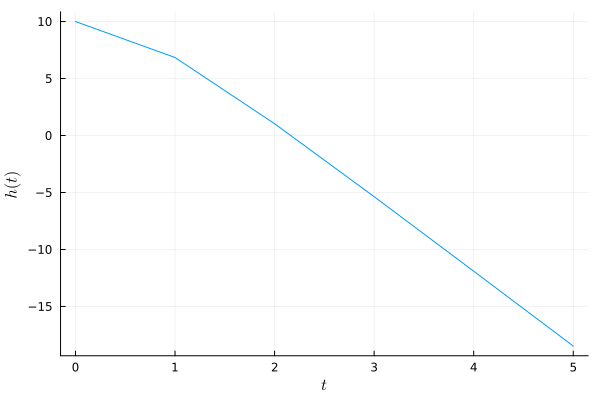

In [124]:
#problema 4
k=0.149
g_1=9.8  #lo llamo g_1 para que no crea reescribo a la funcion g(x)
altura=10
m=0.1
h(x)=altura-(m*g_1/k)x+(g_1*(m^2) /(k^2))*(1-exp(-k*x/m))

plot(0:1:5,h,xlabel=L"t",ylabel=L"h(t)",label="")
#vemos que la raiz va a estar entre 1.5 y 2.5 mas o menos (mejor digo 1 y 3)


In [127]:
#h(x)=altura-(m*g_1/k)x+(g_1*(m^2) /(k^2))*(1-exp(-k*x/m))
hprima(x)=((-m*g_1)/k) +((g_1*(m^2))/(k^2))*((k/m)*exp((-k)*x/m))
p_1=2.5 # para newton
interv=(2.,3.) #para bi
conv1,vec_p1,vec_h1,vec_c1, vec_r1,iter1=biseccion(h,interv;tolx=0.01,tolf=0.01,n_max=100) #hay que ejecutar todo en orden
println("newton")
conv2,vec_p2,vec_h2,vec_c2, vec_r2,iter2=newton_raphson(h,hprima,p_1;tolx=0.01,tolf=0.01,n_max=100) #y guardo los valores retornados

println(" el tiempo que le tomó llegar al suelo, según biseccion: $(vec_p1[iter1]) , y segun newton: $(vec_p2[iter2]) ")

newton
en newton
comienzo , p_1 vale: 2.5
 valor de fp: -2.135177867745959
aqui es donde sale el problema, fprima es : hprima 
 fprima(p_1): -6.41858497705852 
 valor de fp_p: -6.41858497705852
entro al for
actualizo el valor de p_1
actualizo el valor de p_1
convergio :D
 el tiempo que le tomó llegar al suelo, según biseccion: 2.1640625 , y segun newton: 2.167344457481272 


### Problema 5

Encuentre la solución a la ecuación 
$$
x - \cos x = 0 
$$
en el intervalo $[0, \pi/2]$ con un error relativo $\varepsilon_x=10^{-10}$ utilizando:

1. el método de la **secante** con $p_1=0.0$ y $p_2=\pi/2$,

2. el método de **regula falsi** con $a=0.0$ y $b=\pi/2$,

3. el método de **bisección** con $a=0.0$ y $b=\pi/2$ y

4. el método de **Newton** con $p_1=1$.

Graficar el error relativo $r_i$ retornado por cada método vs el número de iteración $i$. Utilice las escalas log-lineal (es decir, logarítmica en el eje $y$ y lineal en el $x$).

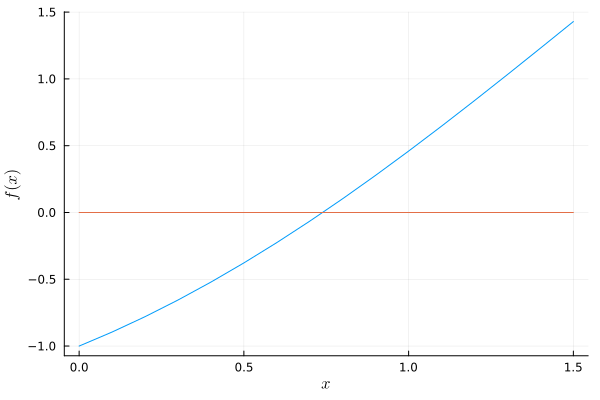

In [12]:
#problema 5
#primero grafico la función
f(x)=x-cos(x)
g(x)=0
inter=(0.,pi/2.)  #el intervalo donde la evaluaré
a,b=inter
plot(a:0.1:b,f,xlabel=L"x",ylabel=L"f(x)",label="")
plot!(a:0.1:b,g,label="") #para ver mejor el eje x solamente (asi veo la raiz)
#vemos que la raiz estará mas o menos en x=0.75

In [ ]:
#método de la secante:
p_s1=0.0
p_s2=pi/2 #son los p1 y p2 para la secante



### Problema 6

Dado el siguiente polinomio, $p(x) = -10 + 5 x - 12 x^2  + 6 x^3  - 2 x^4  + x^5$.

Grafique y observe que posee una única raíz real positiva. Encuentre la misma utilizando:

1. El método de bisección. Elija el intervalo $[a,b]$ utilizando el **teorema de las cotas de Cauchy** que acota la región del espacio complejo donde se encuentran las raíces. Evalúe el polinomio utilizando el **algoritmo de Horner**.

2. El método de Newton-Raphson. Elija el valor inicial utilizando los teoremas que acotan la región del espacio complejo donde se encuentran las raíces. Evalúe el polinomio y su derivada utilizando el **algoritmo de Horner**.

**Teorema de las cotas de Cauchy**

Sea $p(x) = a_0 + a_1x + a_2x^2+...+a_nx^n$ un polinomio sobre $\mathbb{C}$ de grado $n\geq 1$ y coeficientes $a_i\in \mathbb{C}$ para $i=0,1,...,n$. Luego, todas las raices de $p$ se encuentran en el intervalo $[-(M+1),M+1]$ para $M = \max\left\{\frac{|a_0|}{|a_n|},\frac{|a_0|}{|a_n|},...,\frac{|a_{n-1}|}{|a_n|}\right\}$.

**Algoritmo de Horner**

Cualquier polinomio
$$
p(x)=a_0+a_1x+a_2x^2+...+a_{n-1}x^{n-1}+a_nx^n
$$
puede ser reescrito como
$$
p(x)=a_0+x(a_1+x(a_2+...+x(a_{n-1}+xa_n)...))
$$
El algoritmo de Horner consiste en calcular $p(x)$ para un valor dado de $x$ sacando ventaja de la anterior expresión, ya que nos evita tener que calcular potencias $x^2, x^3, ..., x^n$ lo cual resulta numericamente costozo y tendiente a introducir errores numéricos indeseables.
Notar que
$$
p'(x)=a_1+2a_2x+3a_3x^2+...+(n-1)a_{n-1}x^{n-2}+na_nx^{n-1}
$$
lo cual se reduce a
$$
p'(x)=a_1+x(2a_2+x(3a_3+...+x((n-1)a_{n-1}+xna_n))+...)))
$$

## Ejercicios Complementarios

### Problema C.1

Cree una función para calcular una aproximación a la raíz cúbica $x=R^{1/3}$ de un número $R$ positivo. La función debe tomar como entrada el número $R$, la aproximación inicial $x_0$, el error máximo permitido $\epsilon$, y debe utilizar el algoritmo de de Newton-Raphson para calcular la raíz. Ponga a prueba la función con $R=40$, $x_0=20$ y $\epsilon=10^{-5}$